In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [11]:


def search_and_filter_highest_occurrence(csv_file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Find the most common phone number
    most_common_phone = df['phone'].mode().iloc[0]

    # Filter records with the most common phone number
    matching_records = df[df['phone'] == most_common_phone]

    return most_common_phone, matching_records[['phone', 'created_at', 'outcome_name', 'price', 'updated_at']]

# Example usage:
csv_file_path = 'C:\\Users\\jovan\\OneDrive\\Documents\\Vs Code\\Python VSCODE\\Bangkit\\Capstone\\reports_dec.csv'  # Replace with the path to your CSV file
most_common_phone, matching_records = search_and_filter_highest_occurrence(csv_file_path)

print(f"The most common phone number is {most_common_phone}")
print(f"Found {len(matching_records)} record(s) with the most common phone number:")
print(matching_records)


The most common phone number is e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8408905504d2b139481
Found 226 record(s) with the most common phone number:
                                                  phone  \
1716  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
1719  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
1736  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
1774  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
1775  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
...                                                 ...   
4397  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
4398  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
4399  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
4400  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   
4401  e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8...   

                    created_at       outcome_name  price  \
1716  2023-08-25T05:55:56.775Z              maksi  12000   
1719  2023-08-25T06

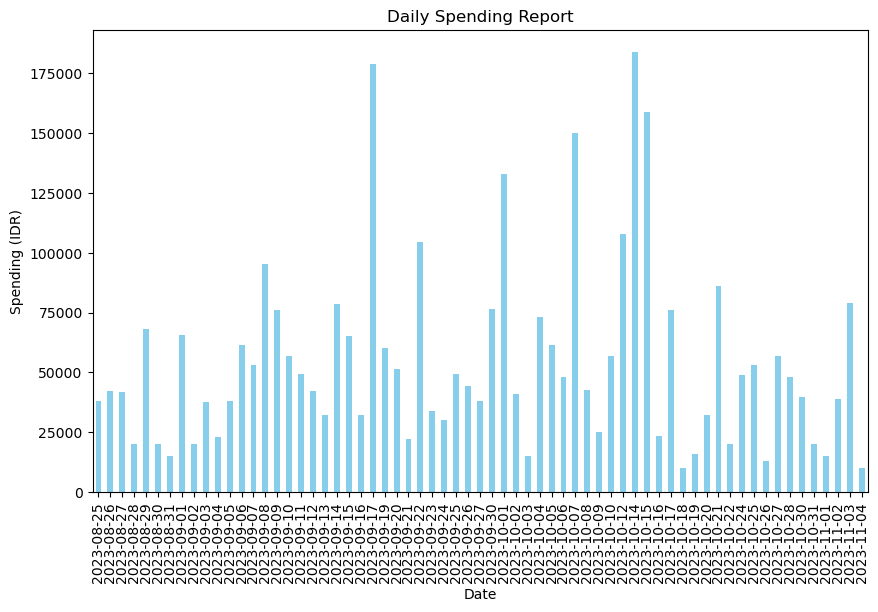

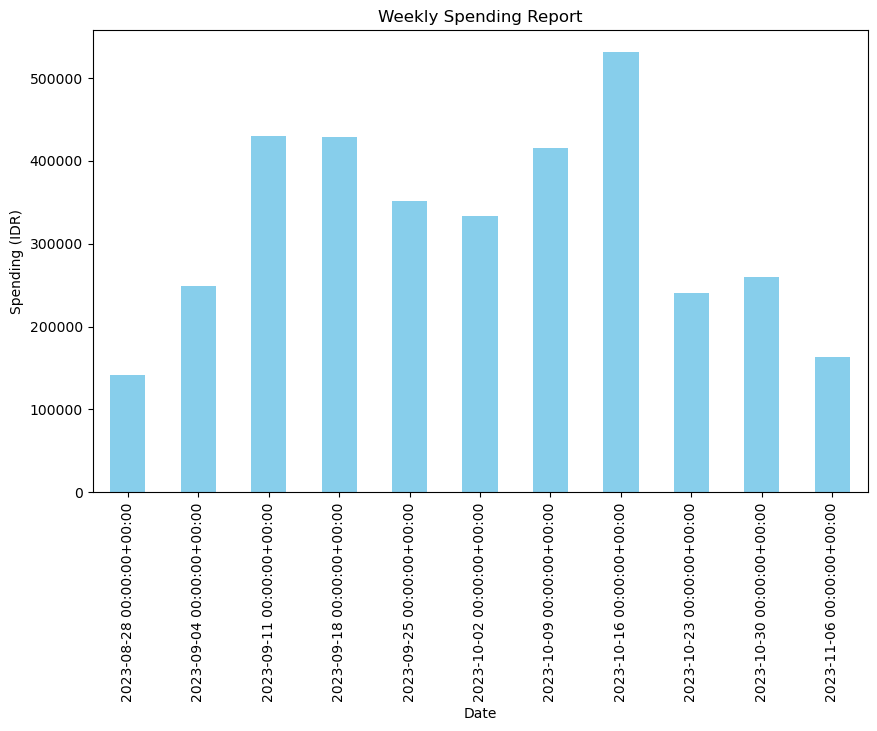

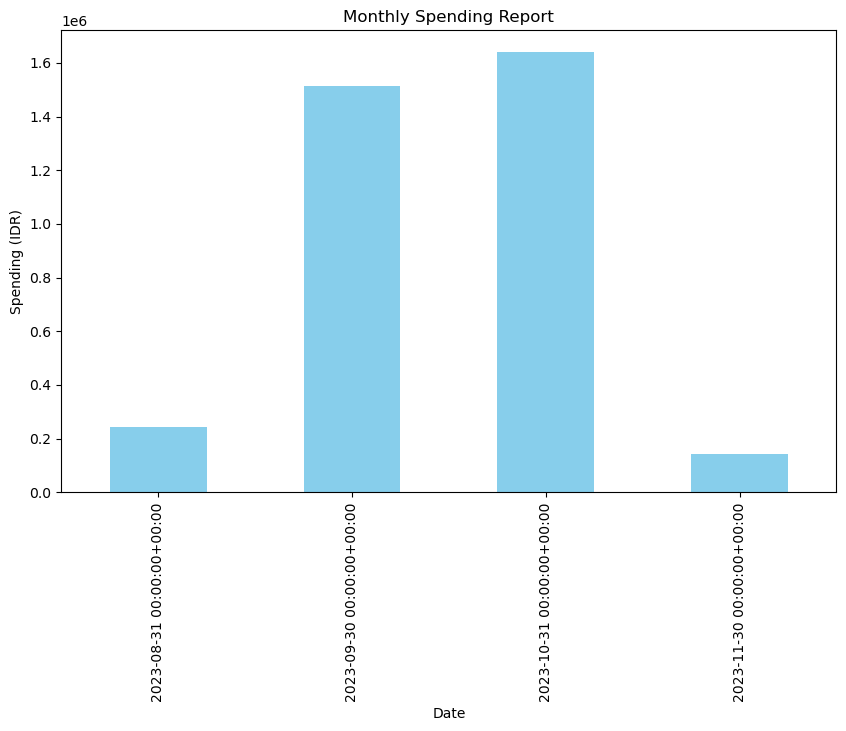

In [12]:



def load_csv(file_path):
    return pd.read_csv(file_path)

def filter_records_by_phone(dataset, target_phone):
    return dataset[dataset['phone'] == target_phone].copy()

def plot_spending_report(records, period, title):
    records['created_at'] = pd.to_datetime(records['created_at'])
    records['price'] = pd.to_numeric(records['price'], errors='coerce')  # Convert 'price' to numeric, handle non-numeric values

    if records['price'].isnull().any():
        print("Warning: Some 'price' values are not numeric and have been set to NaN.")

    if period == 'day':
        grouping = records.groupby(records['created_at'].dt.date)['price'].sum()
    elif period == 'week':
        grouping = records.groupby(pd.Grouper(key='created_at', freq='W-Mon'))['price'].sum()
    elif period == 'month':
        grouping = records.groupby(pd.Grouper(key='created_at', freq='M'))['price'].sum()

    plt.figure(figsize=(10, 6))
    grouping.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Spending (IDR)')
    plt.show()

# Example usage:
csv_file_path = 'C:\\Users\\jovan\\OneDrive\\Documents\\Vs Code\\Python VSCODE\\Bangkit\\Capstone\\reports_dec.csv'  # Replace with the path to your CSV file
target_phone_number = 'e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8408905504d2b139481'

# Load the CSV file
dataset = load_csv(csv_file_path)

# Filter records for the specified phone number
user_records = filter_records_by_phone(dataset, target_phone_number)

# Plot daily spending report
plot_spending_report(user_records, 'day', 'Daily Spending Report')

# Plot weekly spending report
plot_spending_report(user_records, 'week', 'Weekly Spending Report')

# Plot monthly spending report
plot_spending_report(user_records, 'month', 'Monthly Spending Report')


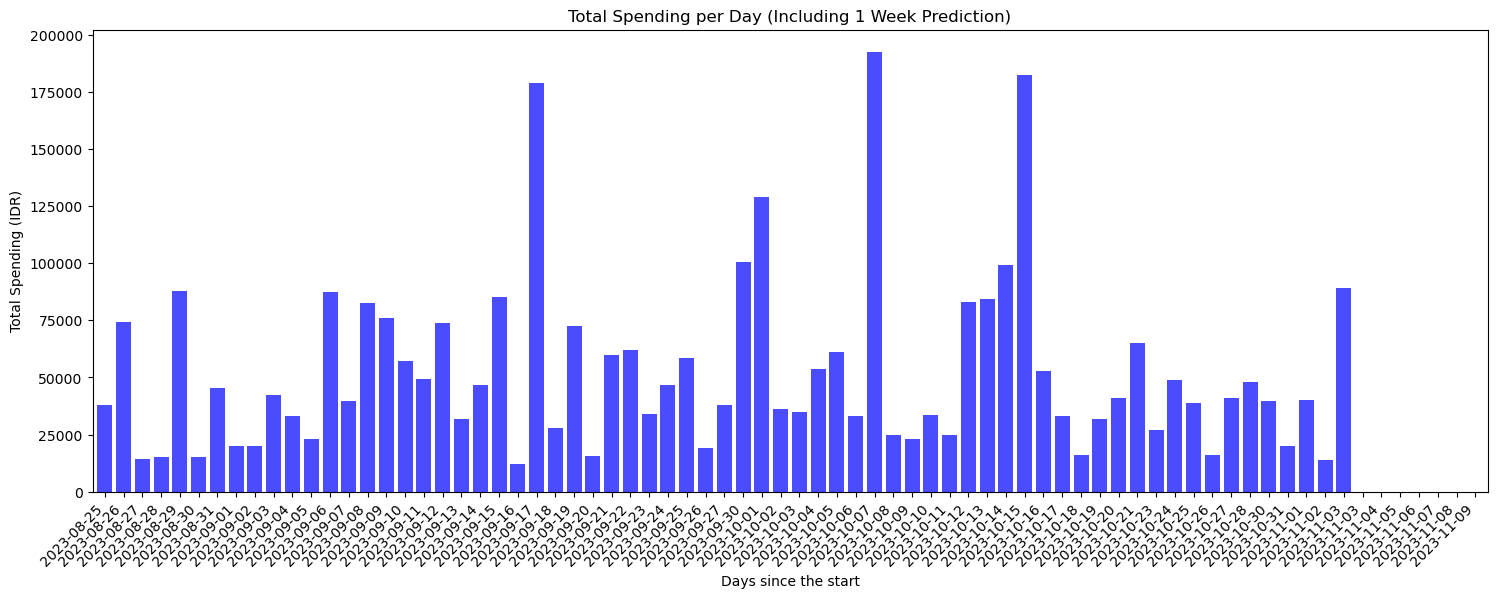

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = 'C:\\Users\\jovan\\OneDrive\\Documents\\Vs Code\\Python VSCODE\\Bangkit\\Capstone\\reports_dec.csv'
dataset = pd.read_csv(csv_file_path)

# Filter records for the specified phone number
target_phone_number = 'e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8408905504d2b139481'
user_records = dataset[dataset['phone'] == target_phone_number].copy()

# Preprocess the data
user_records['created_at'] = pd.to_datetime(user_records['created_at'])
user_records['price'] = pd.to_numeric(user_records['price'], errors='coerce')

# Extract features (days since the earliest date)
user_records['days_since_start'] = (user_records['created_at'] - user_records['created_at'].min()).dt.days

# Group by day and sum the spending for each day
daily_spending = user_records.groupby('days_since_start')['price'].sum()

# Extend the dataset for the next 1 week prediction
prediction_days = pd.date_range(user_records['created_at'].max(), periods=7, freq='D')
prediction_days_since_start = (prediction_days - user_records['created_at'].min()).days
predicted_spending = pd.Series(index=prediction_days_since_start, dtype='float64')

# Concatenate the original data and the prediction data
extended_daily_spending = pd.concat([daily_spending, predicted_spending]).sort_index()

# Plot the total spending for each day
plt.figure(figsize=(18, 6))  # Increase the figure width
ax = extended_daily_spending.plot(kind='bar', color='blue', alpha=0.7, width=0.8)  # Adjust the bar width
plt.title('Total Spending per Day (Including 1 Week Prediction)')
plt.xlabel('Days since the start')
plt.ylabel('Total Spending (IDR)')

# Label each bar with the formatted date
formatted_dates = [date.strftime('%Y-%m-%d') for date in pd.to_datetime("2023-08-25T05:55:56.775Z", utc=True) + pd.to_timedelta(extended_daily_spending.index, unit='D')]
plt.xticks(range(len(extended_daily_spending.index)), formatted_dates, rotation=45, ha='right')

plt.show()


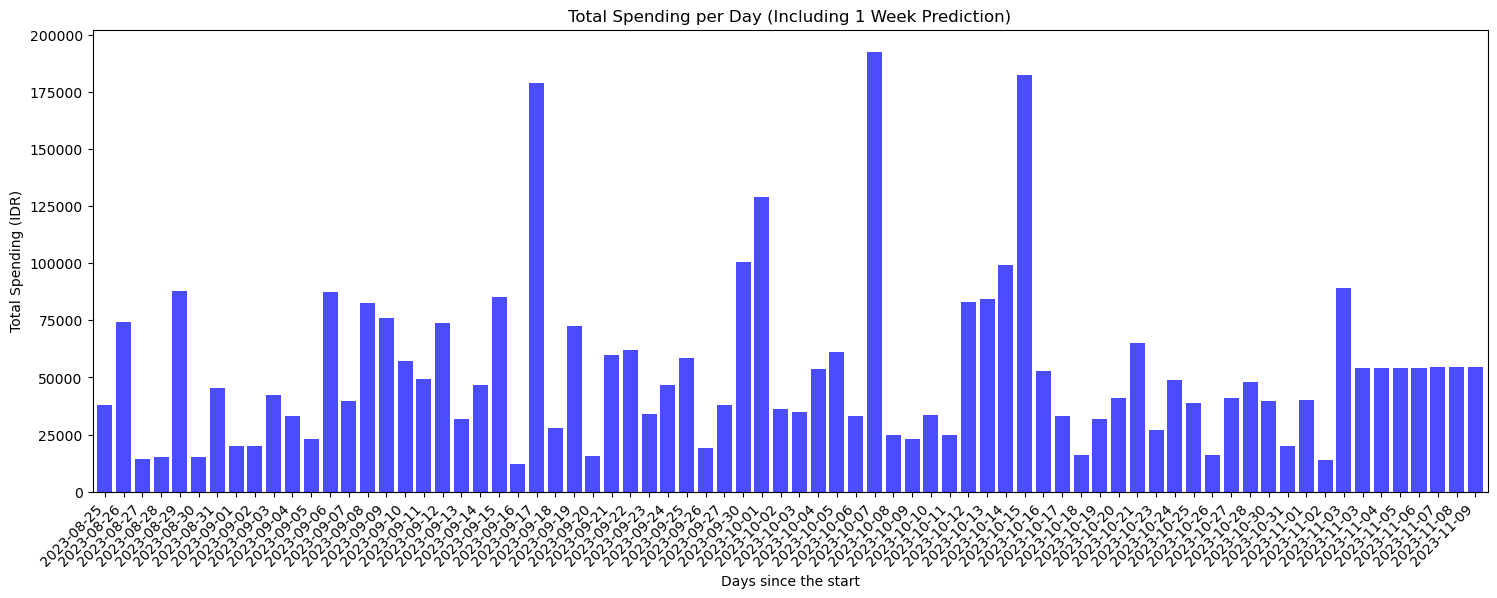

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
csv_file_path = 'C:\\Users\\jovan\\OneDrive\\Documents\\Vs Code\\Python VSCODE\\Bangkit\\Capstone\\reports_dec.csv'
dataset = pd.read_csv(csv_file_path)

# Filter records for the specified phone number
target_phone_number = 'e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8408905504d2b139481'
user_records = dataset[dataset['phone'] == target_phone_number].copy()

# Preprocess the data
user_records['created_at'] = pd.to_datetime(user_records['created_at'])
user_records['price'] = pd.to_numeric(user_records['price'], errors='coerce')

# Extract features (days since the earliest date)
user_records['days_since_start'] = (user_records['created_at'] - user_records['created_at'].min()).dt.days

# Group by day and sum the spending for each day
daily_spending = user_records.groupby('days_since_start')['price'].sum()

# Linear Regression for prediction
X = daily_spending.index.values.reshape(-1, 1)
y = daily_spending.values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict spending for the next 1 week
prediction_days = pd.date_range(user_records['created_at'].max(), periods=7, freq='D')
prediction_days_since_start = (prediction_days - user_records['created_at'].min()).days
predicted_spending = model.predict(prediction_days_since_start.values.reshape(-1, 1))

# Create a DataFrame for the predicted values
predicted_df = pd.Series(predicted_spending, index=prediction_days_since_start)

# Concatenate the original data and the prediction data
extended_daily_spending = pd.concat([daily_spending, predicted_df]).sort_index()

# Plot the total spending for each day
plt.figure(figsize=(18, 6))
ax = extended_daily_spending.plot(kind='bar', color='blue', alpha=0.7, width=0.8)
plt.title('Total Spending per Day (Including 1 Week Prediction)')
plt.xlabel('Days since the start')
plt.ylabel('Total Spending (IDR)')

# Label each bar with the formatted date
formatted_dates = [date.strftime('%Y-%m-%d') for date in pd.to_datetime("2023-08-25T05:55:56.775Z", utc=True) + pd.to_timedelta(extended_daily_spending.index, unit='D')]
plt.xticks(range(len(extended_daily_spending.index)), formatted_dates, rotation=45, ha='right')

plt.show()


1/1 [==============================] - 0s 109ms/step


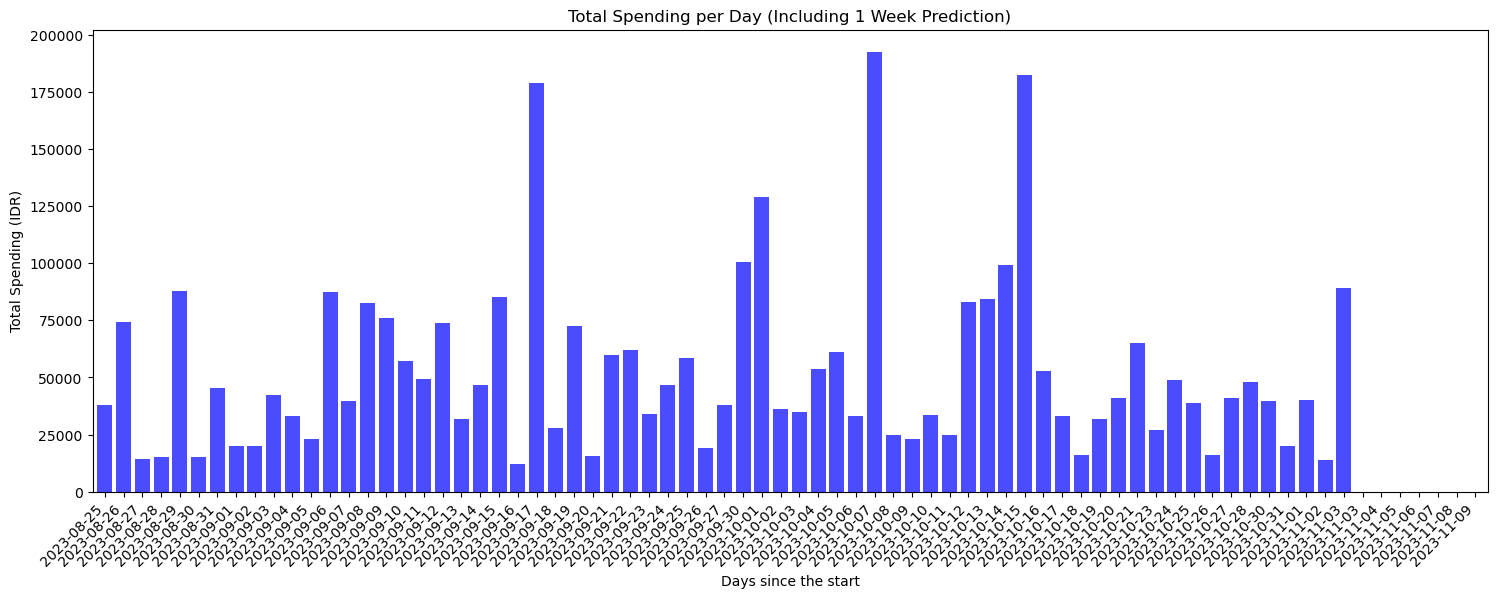

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file
csv_file_path = 'C:\\Users\\jovan\\OneDrive\\Documents\\Vs Code\\Python VSCODE\\Bangkit\\Capstone\\reports_dec.csv'
dataset = pd.read_csv(csv_file_path)

# Filter records for the specified phone number
target_phone_number = 'e8090332b4f50fae93c1959a252b212ebc92f188b9f1a8408905504d2b139481'
user_records = dataset[dataset['phone'] == target_phone_number].copy()

# Preprocess the data
user_records['created_at'] = pd.to_datetime(user_records['created_at'])
user_records['price'] = pd.to_numeric(user_records['price'], errors='coerce')

# Extract features (days since the earliest date)
user_records['days_since_start'] = (user_records['created_at'] - user_records['created_at'].min()).dt.days

# Group by day and sum the spending for each day
daily_spending = user_records.groupby('days_since_start')['price'].sum()

# Linear Regression for prediction
X = daily_spending.index.values.reshape(-1, 1)
y = daily_spending.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1,)))
model.add(Dense(1))  # Output layer with one neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=0)

# Predict spending for the next 1 week
prediction_days = pd.date_range(user_records['created_at'].max(), periods=7, freq='D')
prediction_days_since_start = (prediction_days - user_records['created_at'].min()).days
X_pred_scaled = scaler.transform(prediction_days_since_start.values.reshape(-1, 1))
predicted_spending = model.predict(X_pred_scaled).flatten()

# Create a DataFrame for the predicted values
predicted_df = pd.Series(predicted_spending, index=prediction_days_since_start)

# Concatenate the original data and the prediction data
extended_daily_spending = pd.concat([daily_spending, predicted_df]).sort_index()

# Plot the total spending for each day
plt.figure(figsize=(18, 6))
ax = extended_daily_spending.plot(kind='bar', color='blue', alpha=0.7, width=0.8)
plt.title('Total Spending per Day (Including 1 Week Prediction)')
plt.xlabel('Days since the start')
plt.ylabel('Total Spending (IDR)')

# Label each bar with the formatted date
formatted_dates = [date.strftime('%Y-%m-%d') for date in pd.to_datetime("2023-08-25T05:55:56.775Z", utc=True) + pd.to_timedelta(extended_daily_spending.index, unit='D')]
plt.xticks(range(len(extended_daily_spending.index)), formatted_dates, rotation=45, ha='right')

plt.show()
